# EX 9 Time Series: Apple Stock

Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2. Import the dataset from this address
Step 3. Assign it to a variable apple

In [9]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple_stock = pd.read_csv(url)

apple_stock.head()

Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

Step 4. Check out the type of the columns

In [5]:
apple_stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Step 5. Transform the Date column as a datetime type

In [10]:
apple_stock.Date = pd.to_datetime(apple_stock.Date)

print(apple_stock.Date)

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]


Step 6. Set the date as the index

In [17]:
#apple_stock = apple_stock.set_index(apple_stock.Date)
apple_stock.index = apple_stock.Date
apple_stock.drop(columns='Date', inplace=True)

apple_stock.head()

Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

Step 7. Is there any duplicate dates?

In [18]:
apple_stock.index.is_unique

True

Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [19]:
apple_stock.sort_index(ascending= True)
#apple_stock.sort_values(by='Adj Close', ascending= True)

Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
...           ...    ...    ...    ...        ...        ...
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35

[8465 rows x 6 columns]

Step 9. Get the last business day of each month

In [67]:
last_B_day = apple_stock.resample('BM').mean() #Other args: B-days, W-weeks, BY-years

last_B_day.head()


Open    High      Low    Close       Volume  Adj Close
Date                                                                 
1980-12-14  28.7500  28.870  28.7500  28.7500  117258400.0      0.450
1980-12-21  26.7000  26.776  26.6500  26.6500   24506720.0      0.412
1980-12-28  32.1275  32.250  32.1275  32.1275   11743200.0      0.500
1981-01-04  35.0000  35.095  34.9375  34.9375   13715800.0      0.545
1981-01-11  31.8980  31.922  31.8020  31.8020    9895200.0      0.496

Step 10. What is the difference in days between the first day and the oldest

In [84]:
(apple_stock.index.max() - apple_stock.index.min()).days

# business_days = apple_stock.resample('B') #Other args: B-days, W-weeks, BY-years
# print(len(business_days))

12261

Step 11. How many months in the data we have?

In [57]:
print(len(last_B_day), 'months')

404 months


Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

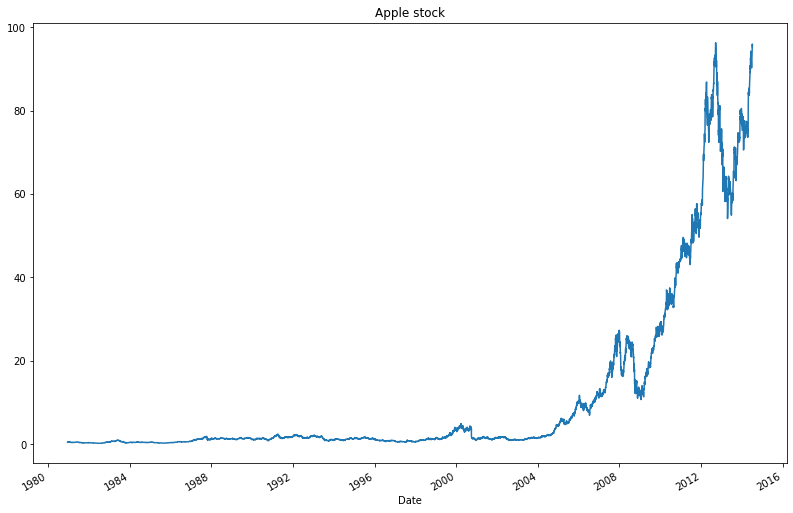

In [95]:
stock_plot = apple_stock['Adj Close'].plot(title = "Apple stock")

# changes the size of the graph
figure = stock_plot.get_figure()
figure.set_size_inches(13.5, 9)

BONUS: Create your own question and answer it.